In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Sourabh\Desktop\Machine Learning\Auto.csv")

In [3]:
df

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            156 non-null    float64
 1   Engine_size      156 non-null    float64
 2   Horsepower       156 non-null    int64  
 3   Wheelbase        156 non-null    float64
 4   Width            156 non-null    float64
 5   Length           156 non-null    float64
 6   Curb_weight      156 non-null    float64
 7   Fuel_capacity    156 non-null    float64
 8   Fuel_efficiency  156 non-null    int64  
 9   Resale           156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [5]:
df1=df.iloc[:,1:]

In [6]:
df1

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...
151,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


In [7]:
df.isna().sum()  # no missing data

Price              0
Engine_size        0
Horsepower         0
Wheelbase          0
Width              0
Length             0
Curb_weight        0
Fuel_capacity      0
Fuel_efficiency    0
Resale             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            156 non-null    float64
 1   Engine_size      156 non-null    float64
 2   Horsepower       156 non-null    int64  
 3   Wheelbase        156 non-null    float64
 4   Width            156 non-null    float64
 5   Length           156 non-null    float64
 6   Curb_weight      156 non-null    float64
 7   Fuel_capacity    156 non-null    float64
 8   Fuel_efficiency  156 non-null    int64  
 9   Resale           156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [9]:
for i in df1:                  # i = column name 
    if df1[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df1[i].quantile(0.25)  # for 1 column compute q1
        q3 = df1[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df1[i].clip(upper=ul,lower=ll,inplace=True)

In [10]:
# Putting feature variable to X
X = df1

# Putting response variable to y
y = df[['Price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=134)

In [11]:
y.shape

(156, 1)

In [12]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeRegressor()

In [13]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
131,18.835,2.2,137.0,106.5,69.0,190.4,3.075,13.1,27.0,18.061000
88,22.605,4.6,200.0,114.7,78.2,212.0,3.958,19.0,21.0,14.875000
8,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,26.410625
0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
122,25.635,3.4,185.0,120.0,72.7,201.3,3.942,25.0,23.0,18.061000


In [14]:
independent_variable = list(train.columns[1:])
independent_variable

['Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Resale']

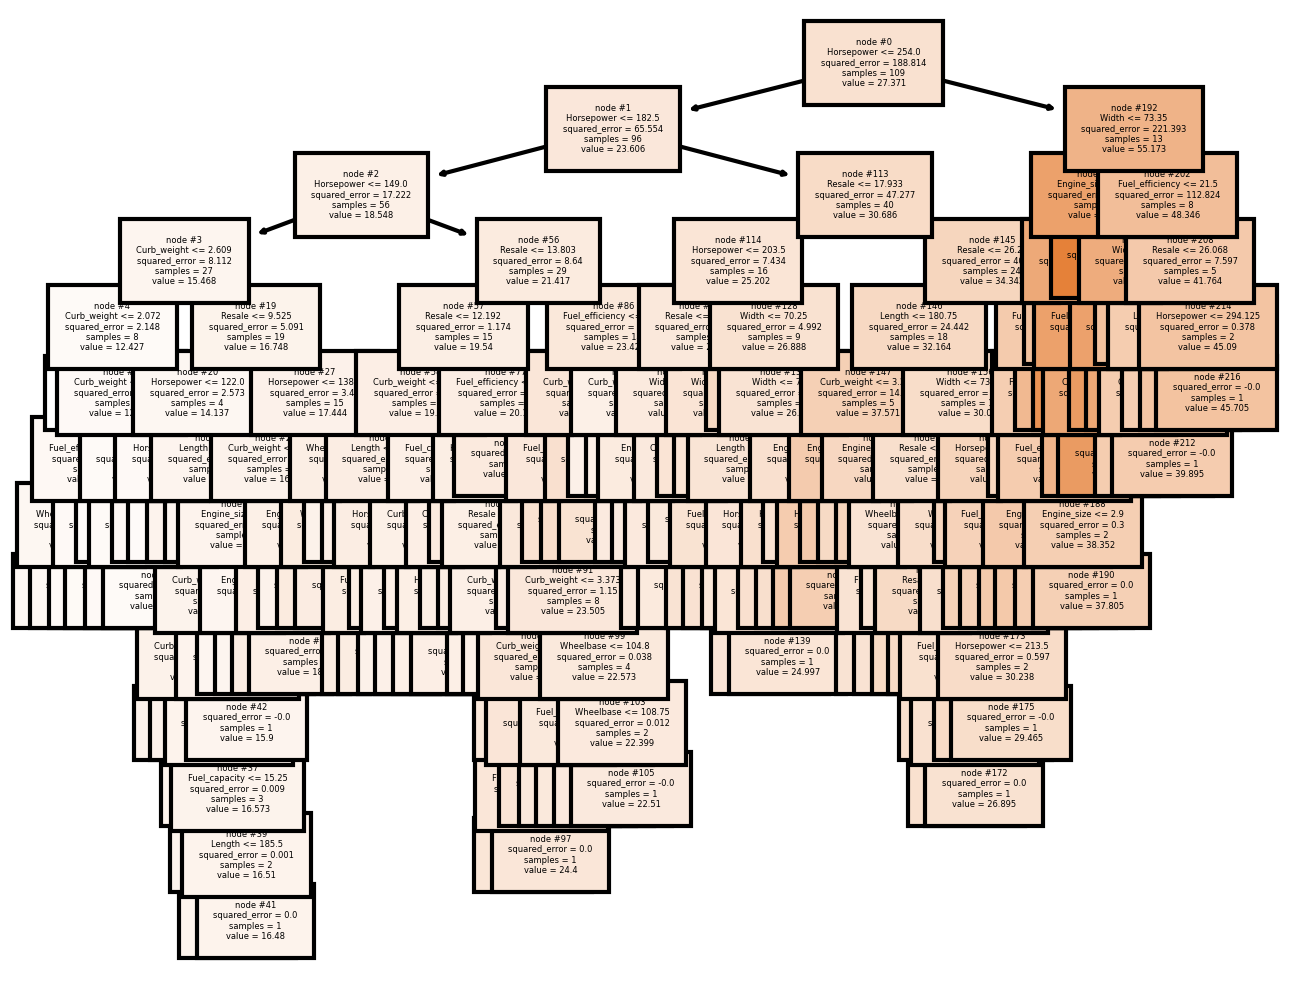

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

price = y_train  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = price, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [16]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Predicted
131,18.835,2.2,137.0,106.5,69.0,190.4,3.075,13.1,27.0,18.061000,18.835
88,22.605,4.6,200.0,114.7,78.2,212.0,3.958,19.0,21.0,14.875000,22.605
8,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,26.410625,33.400
0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000,21.500
122,25.635,3.4,185.0,120.0,72.7,201.3,3.942,25.0,23.0,18.061000,25.635


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.Predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  100.0


In [18]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor(criterion='squared_error',  #splitter
                                 min_samples_leaf=5, ## child
                                 min_samples_split=8, #parent 
                                 max_depth=5)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

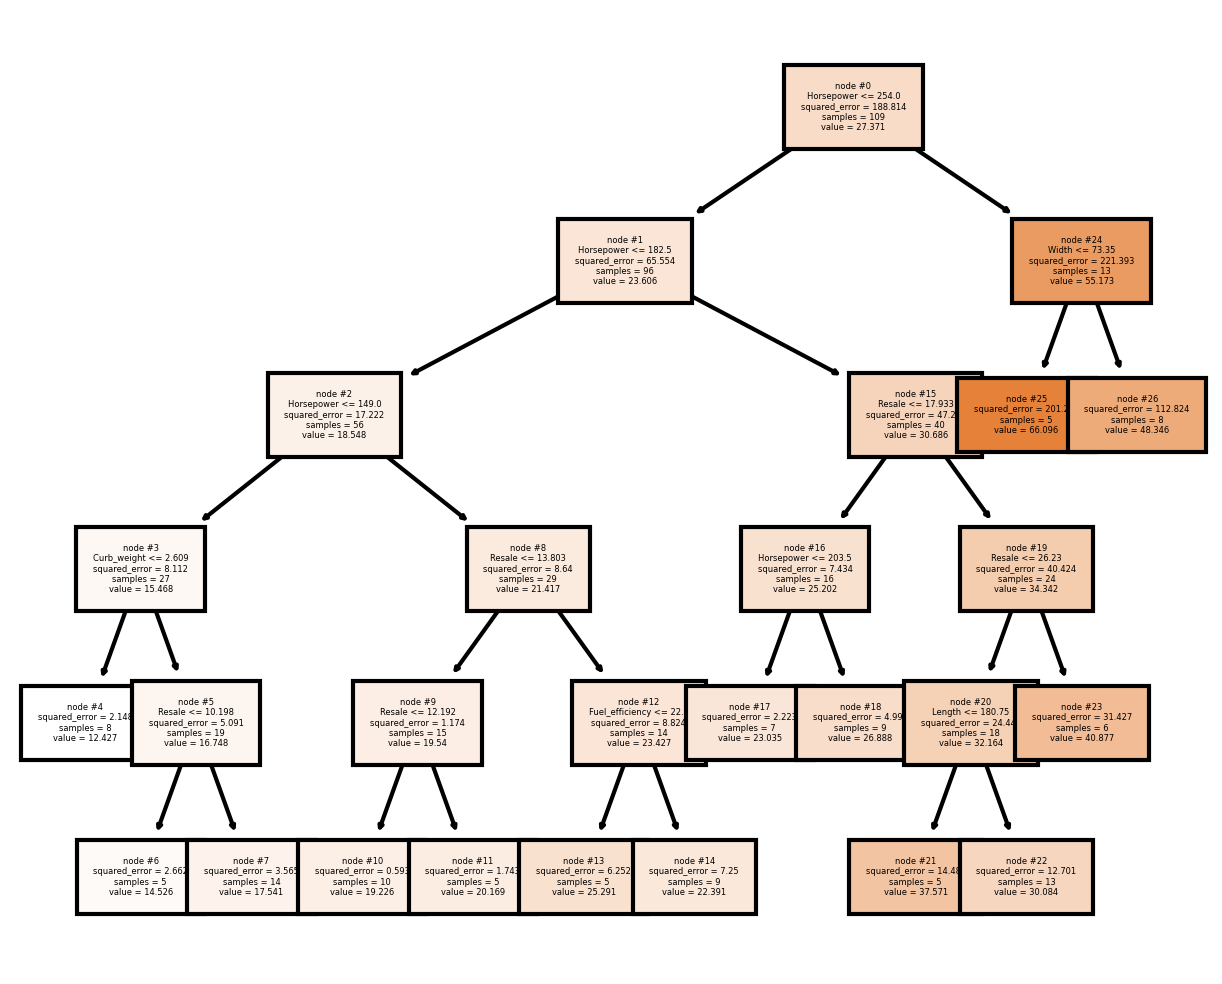

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

churn = y_train  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [20]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Predicted
131,18.835,2.2,137.0,106.5,69.0,190.4,3.075,13.1,27.0,18.061000,17.541429
88,22.605,4.6,200.0,114.7,78.2,212.0,3.958,19.0,21.0,14.875000,23.035000
8,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,26.410625,40.877167
0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000,17.541429
122,25.635,3.4,185.0,120.0,72.7,201.3,3.942,25.0,23.0,18.061000,30.084154


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.Predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  87.0


In [22]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
99,35.300,3.2,215.0,111.0,72.2,180.6,4.387,19.0,20.0,18.061
25,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9.125
12,31.965,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0,20.190
146,21.200,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,16.725
61,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,5.860


In [23]:
test['Predicted'] = dt.predict(X_test)  # MODEL = dt
test.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Predicted
99,35.300,3.2,215.0,111.0,72.2,180.6,4.387,19.0,20.0,18.061,37.571000
25,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9.125,12.426875
12,31.965,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0,20.190,30.084154
146,21.200,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,16.725,22.391444
61,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,5.860,12.426875


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Price,test.Predicted)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  77.0
